# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols,diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1: A Simple Cost Function

## $$f(x) = x^2 + x + 1$$ 

In [2]:
def f(x):
    return x**2 + x + 1

np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)

In [3]:
# Make Data
x_1=np.linspace(-3,3,num=100)

plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

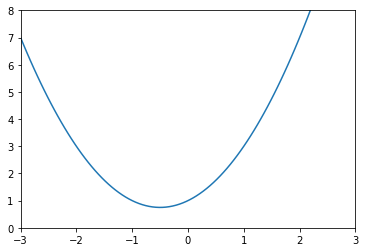

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.plot(x_1,f(x_1))
plt.show()

## Slopes and Derivatives

In [5]:
def df(x):
    return 2*x +1

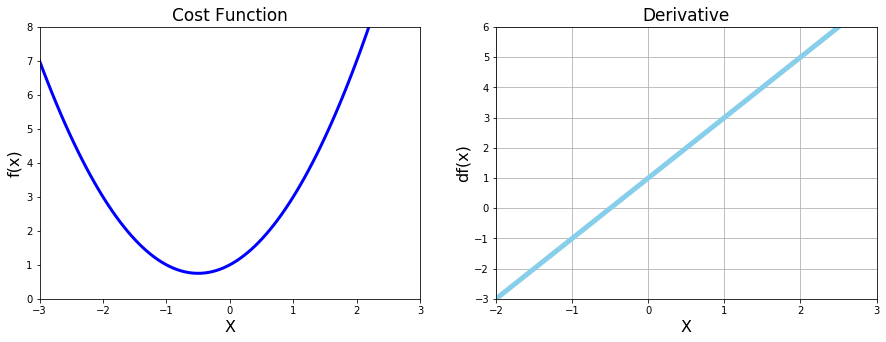

In [6]:
# Plot function and derivative
plt.figure(figsize=[15,5])

# Cost Function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.plot(x_1,f(x_1),color='blue',linewidth=3)
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

# Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)
plt.title('Derivative',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()

plt.show()

## Gradient Descent

In [7]:
new_x=3
previous_x=0
step_multiplier=0.1
precision=0.0001

x_list=[new_x]
slope_list=[df(new_x)]

for n in range(500):
    previous_x=new_x
    grad=df(previous_x)
    new_x=previous_x - (grad * step_multiplier)
    
    step_size=abs(new_x-previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size<precision:
        break
    
    
print('Local Minimum Occurs at : ',new_x)
print('Slope at this point : ', df(new_x))
print('Cost at this point : ',f(new_x))

Local Minimum Occurs at :  -0.49962781616118024
Slope at this point :  0.0007443676776395236
Cost at this point :  0.7500001385208099


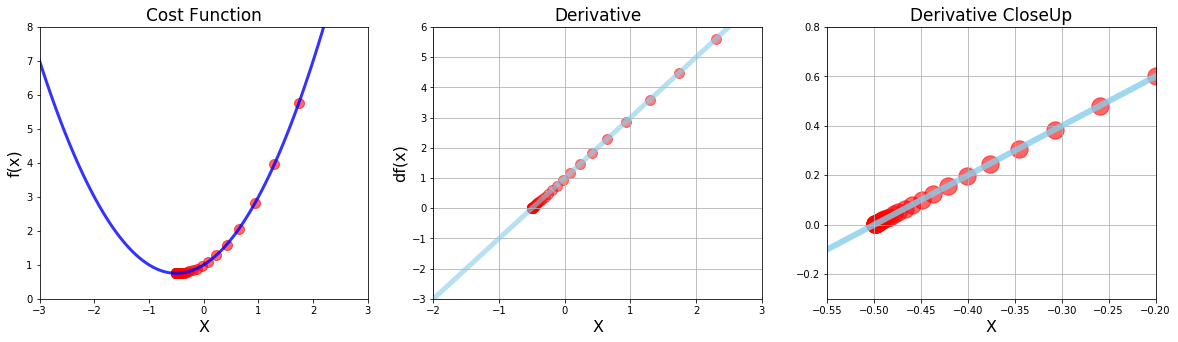

In [8]:
# Superimpose the gradient descent calculations
plt.figure(figsize=[20,5])

# Cost Function
plt.subplot(1,3,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.8)
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

values=np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.6)

# Derivative
plt.subplot(1,3,2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5,alpha=0.6)
plt.title('Derivative',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.5)


# CloseUp
plt.subplot(1,3,3)

plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.plot(x_1,df(x_1),color='skyblue',linewidth=6,alpha=0.8)
plt.title('Derivative CloseUp',fontsize=17)
plt.xlabel('X',fontsize=16)

plt.grid()

plt.scatter(x_list,slope_list,color='red',s=300,alpha=0.6)

plt.show()

# Example 2 : Multiple Minima vs Initial Guess 
## $$g(x) = x^4 -4x^2 +5$$

In [9]:
# Make some data
x_2=np.linspace(-2,2,1000)

In [10]:
def g(x):
    return x**4 - (4*x**2) + 5

In [11]:
def dg(x):
    return (4*x**3) - (8*x)

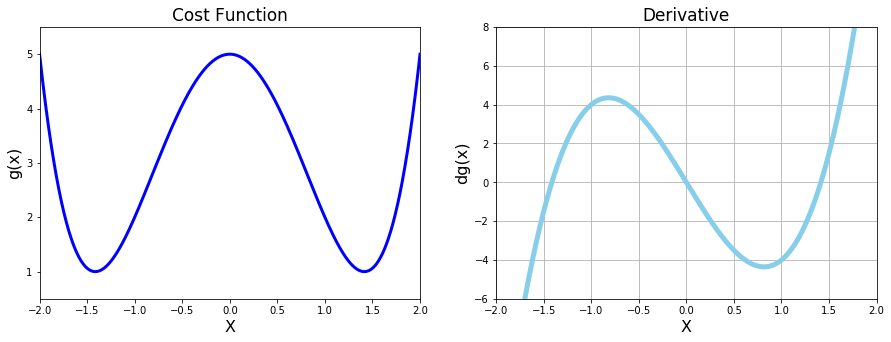

In [12]:
# Plot function and derivative
plt.figure(figsize=[15,5])

# Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.plot(x_2,g(x_2),color='blue',linewidth=3)
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

# Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)
plt.title('Derivative',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.show()

## Gradient Descent as a Function

In [13]:
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001):
    new_x=initial_guess
    previous_x=0
    step_multiplier=multiplier
    

    x_list=[new_x]
    slope_list=[derivative_func(new_x)]

    for n in range(100):
        previous_x=new_x
        grad=derivative_func(previous_x)
        new_x=previous_x - (grad * step_multiplier)

        step_size=abs(new_x-previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size<precision:
            break
            
    return new_x, x_list,slope_list
    
    


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg ,initial_guess= 0.5)

print('Local min occurs at : ',local_min)
print('Number of steps : ',len(list_x))


Local min occurs at :  1.4122375085019094
Number of steps :  23


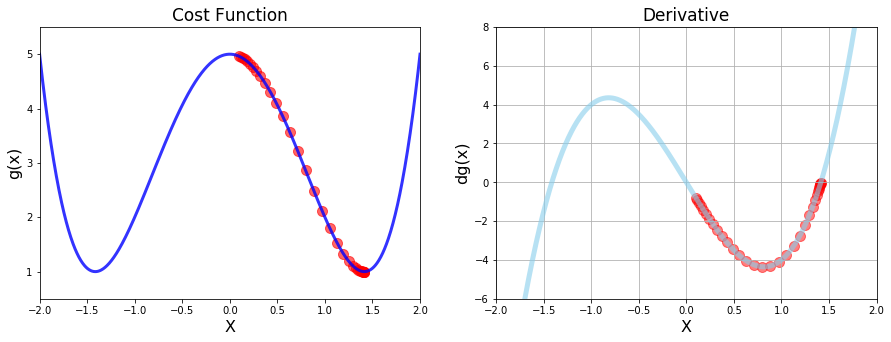

In [15]:
# Calling Gradient Descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg ,initial_guess= 0.1)

# Plot function and derivative and scatterPlot
plt.figure(figsize=[15,5])

# Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.plot(x_2,g(x_2),color='blue',linewidth=3, alpha=0.8)
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

# Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5,alpha=0.6)
plt.title('Derivative',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)

plt.show()

# Example 3: Divergence and Overflow
## $$h(x)=x^5 -2x^4 +2$$

In [16]:
# Make data
x_3=np.linspace(-2.5,2.5,1000)

In [17]:
def h(x):
    return x**5 - 2*x**4 + 2

In [18]:
def dh(x):
    return 5*x**4 - 8*x**3

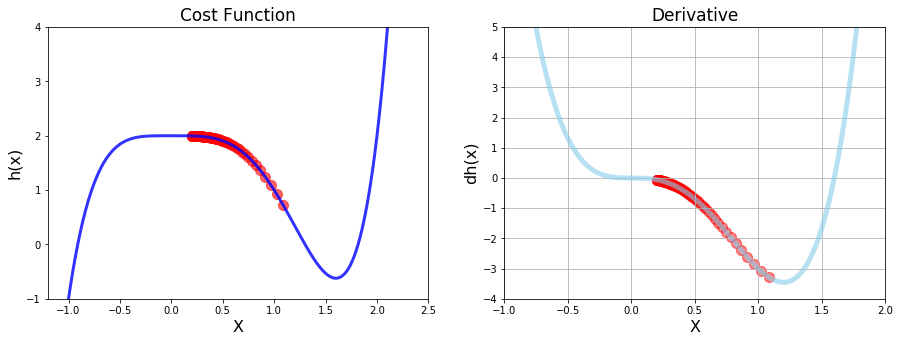

Local min occurs at :  1.0858908268703547
Cost at this min is :  0.7290082698259561
Number of steps :  101


In [19]:
# Calling Gradient Descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh ,initial_guess= 0.2)

# Plot function and derivative and scatterPlot
plt.figure(figsize=[15,5])

# Cost Function
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.plot(x_3,h(x_3),color='blue',linewidth=3, alpha=0.8)
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('h(x)',fontsize=16)

plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)

# Derivative
plt.subplot(1,2,2)

plt.xlim([-1,2])
plt.ylim([-4,5])
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=5,alpha=0.6)
plt.title('Derivative',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.grid()

plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)

plt.show()

print('Local min occurs at : ',local_min)
print('Cost at this min is : ',h(local_min))
print('Number of steps : ',len(list_x))

# The Learning Rate

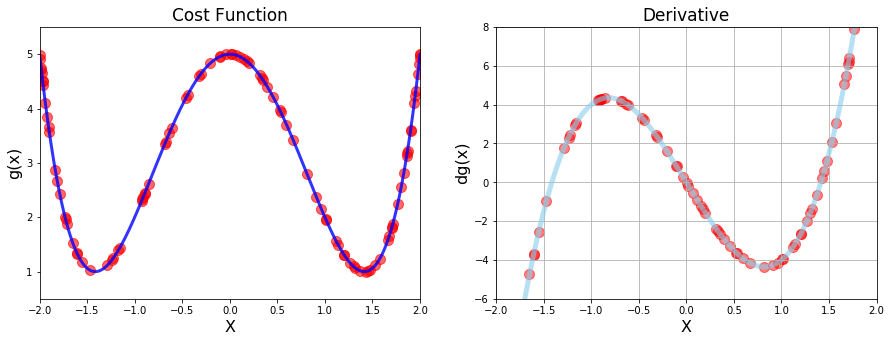

Number of steps :  101


In [20]:
# Calling Gradient Descent to never converge
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg ,initial_guess= 1.9,multiplier=0.25)

# Plot function and derivative and scatterPlot
plt.figure(figsize=[15,5])

# Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.plot(x_2,g(x_2),color='blue',linewidth=3, alpha=0.8)
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

# Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5,alpha=0.6)
plt.title('Derivative',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)

plt.show()

print('Number of steps : ',len(list_x))

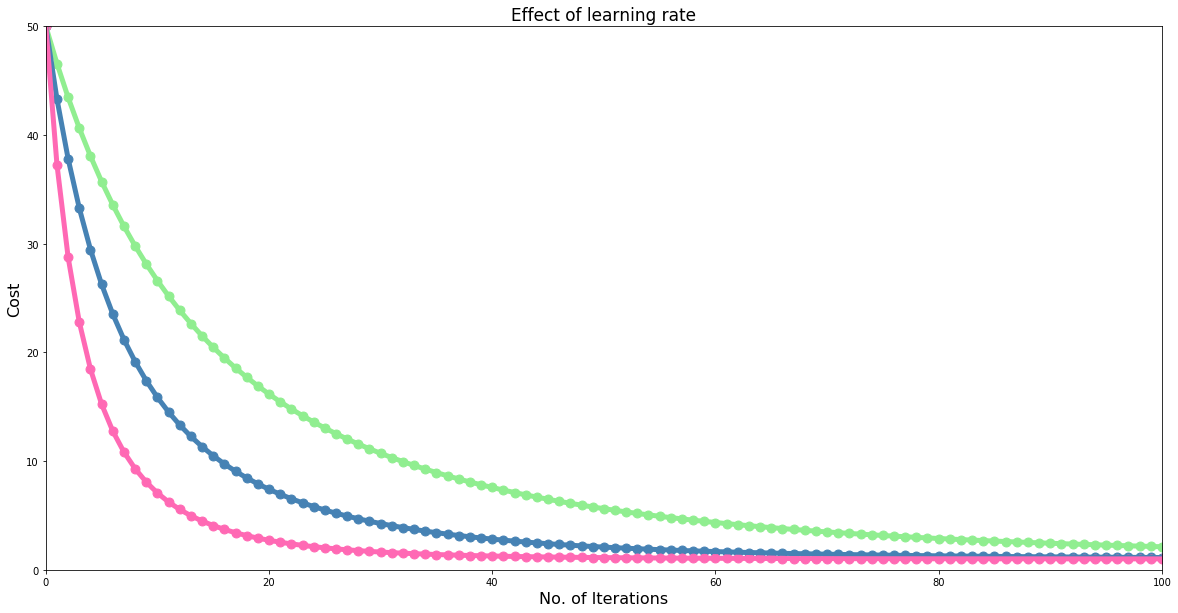

Number of steps :  101


In [21]:
# Calling Gradient Descent to never converge
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg ,initial_guess= 3,multiplier=0.0005,precision=0.0001)

mid_gamma=gradient_descent(derivative_func=dg ,initial_guess= 3,multiplier=0.001,precision=0.0001)

high_gamma=gradient_descent(derivative_func=dg ,initial_guess= 3,multiplier=0.002,precision=0.0001)

# Plot function and derivative and scatterPlot
plt.figure(figsize=[20,10])

# Cost Function


plt.xlim([0,100])
plt.ylim([0,50])

plt.title('Effect of learning rate',fontsize=17)
plt.xlabel('No. of Iterations',fontsize=16)
plt.ylabel('Cost',fontsize=16)

iteration_list=list(range(0,101))

# Low learning rate
plt.plot(iteration_list,g(np.array(list_x)),color='lightgreen',linewidth=5)
plt.scatter(iteration_list,g(np.array(list_x)),color='lightgreen',s=80)

# Mid learning rate 
plt.plot(iteration_list,g(np.array(mid_gamma[1])),color='steelblue',linewidth=5)
plt.scatter(iteration_list,g(np.array(mid_gamma[1])),color='steelblue',s=80)

# High learning rate
plt.plot(iteration_list,g(np.array(high_gamma[1])),color='hotpink',linewidth=5)
plt.scatter(iteration_list,g(np.array(high_gamma[1])),color='hotpink',s=80)


plt.show()

print('Number of steps : ',len(list_x))

# Example 4 : Data Visualisation with 3D Charts
## Minimize - $$f(x,y) = \frac{1}{3^{-x^2 - y^2}+1}$$

In [22]:
def f(x,y):
    r=3**(-x**2 - y**2)
    return 1/(r+1) 

In [23]:
x_4=np.linspace(-2,2,200)
y_4=np.linspace(-2,2,200)

x_4,y_4= np.meshgrid(x_4,y_4)

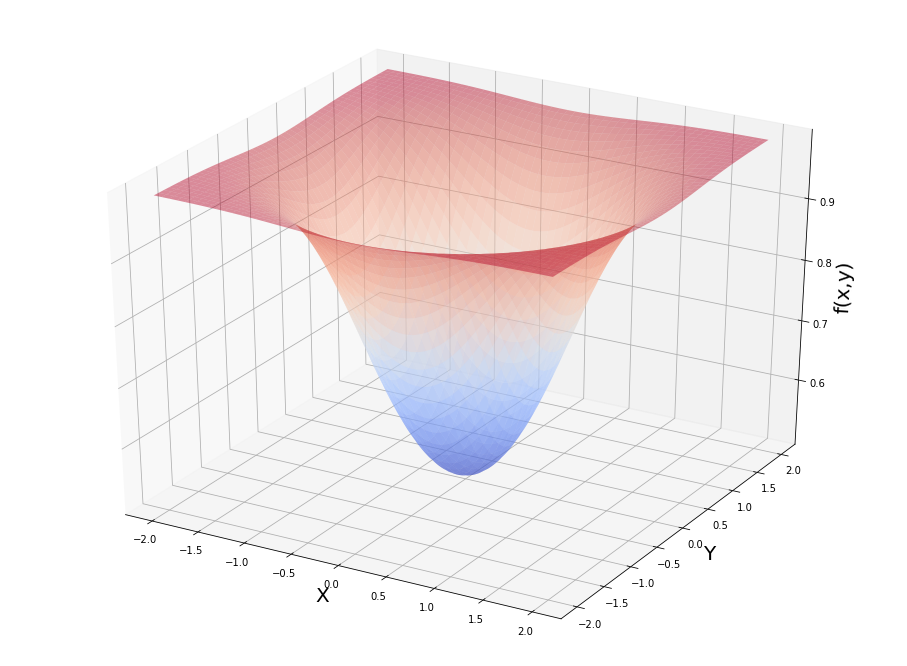

In [24]:
# Generating the plot

fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20)

ax.plot_surface(x_4 , y_4 , f(x_4 , y_4),cmap=cm.coolwarm,alpha=0.45)

plt.show()

## Partial Derivatives and Symbolic Computation

In [25]:
a,b=symbols('x,y')
print('Our cost function f(x,y) is = ', f(a,b))
print('Partial Derivative wrt x is = ', diff(f(a,b),a))        

#To evaluate at a particular point
print('Value of f(1.8,1) = ', f(a,b).evalf(subs={a:1.8,b:1}) )


Our cost function f(x,y) is =  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is =  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(1.8,1) =  0.990604794032582


## Batch Gradient Descent with Sympy

In [26]:
# Setup
max_iter=500
multiplier=0.1
params=np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x=diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y=diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients=np.array([gradient_x,gradient_y])
    params= params - (multiplier*gradients)
    
#Results

print('Values in the gradient array' ,gradients)
print('Minimum occurs at x value of : ',params[0])
print('Minimum occurs at y value of : ',params[1])
print('The Cost is : ',f(params[0],params[1]))

Values in the gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of :  3.45838599885832e-11
Minimum occurs at y value of :  1.92132555492129e-11
The Cost is :  0.500000000000000


In [27]:
# Partial derivatives

def fpx(x,y):
    r=3**(-x**2 - y**2)
    return (2*r*x*log(3))/(r+1)**2

def fpy(x,y):
    r=3**(-x**2 - y**2)
    return (2*r*y*log(3))/(r+1)**2

In [28]:
fpx(1.8,1)

0.036808971619750504

In [29]:
# Setup
max_iter=500
multiplier=0.1
params=np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients=np.array([gradient_x,gradient_y])
    params= params - (multiplier*gradients)
    
#Results

print('Values in the gradient array' ,gradients)
print('Minimum occurs at x value of : ',params[0])
print('Minimum occurs at y value of : ',params[1])
print('The Cost is : ',f(params[0],params[1]))

Values in the gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of :  3.458385998858304e-11
Minimum occurs at y value of :  1.9213255549212797e-11
The Cost is :  0.5


## Graphing 3D Gradient Descent

In [30]:
# Setup
max_iter=500
multiplier=0.1
params=np.array([1.8,1.0])
values_array=params.reshape(1,2)

for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients=np.array([gradient_x,gradient_y])
    params= params - (multiplier*gradients)
    values_array=np.append(values_array,params.reshape(1,2),axis=0)
    
#Results

print('Values in the gradient array' ,gradients)
print('Minimum occurs at x value of : ',params[0])
print('Minimum occurs at y value of : ',params[1])
print('The Cost is : ',f(params[0],params[1]))

Values in the gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of :  3.458385998858304e-11
Minimum occurs at y value of :  1.9213255549212797e-11
The Cost is :  0.5


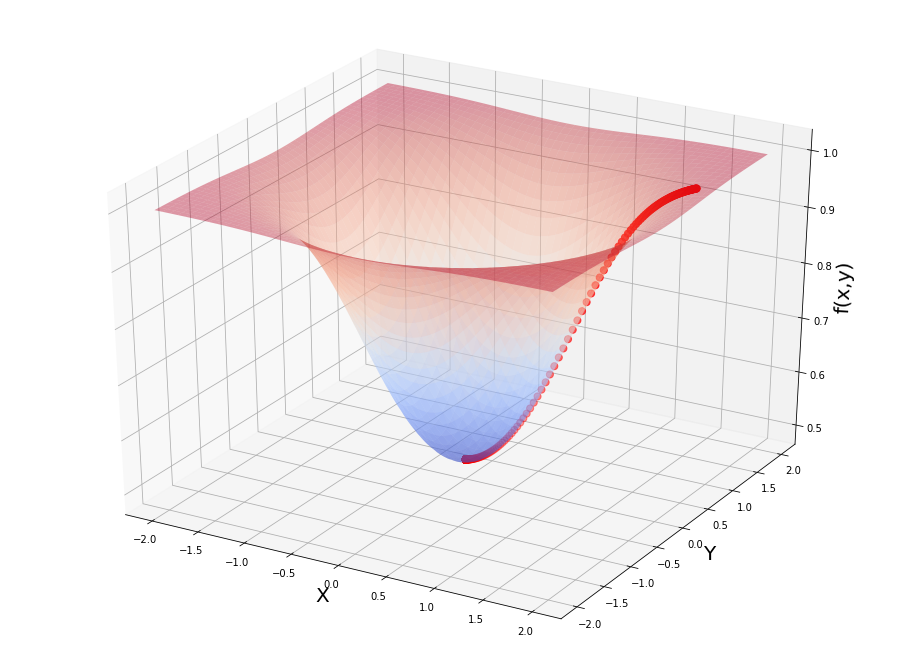

In [31]:
# Generating the plot

fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20)

ax.plot_surface(x_4 , y_4 , f(x_4 , y_4),cmap=cm.coolwarm,alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],
           f(values_array[:,0],values_array[:,1]),s=50,color='red')

plt.show()

# Example 5 : The Mean Squared Error

## $$RSS = \sum_{i=1}^{n} \big( y^{(i)} -h_\theta x^{(i)} \big)^2 $$
## $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} -h_\theta x^{(i)} \big)^2 $$

In [32]:
# Make sample data
x_5=np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5=np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)


In [33]:
# Quick linear reg
regr=LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0 : ', regr.intercept_[0])
print('Theta 1 : ',regr.coef_[0][0])

Theta 0 :  0.8475351486029536
Theta 1 :  1.2227264637835915


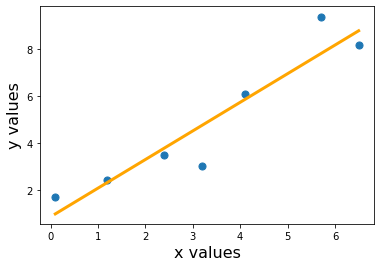

In [34]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),color='orange',linewidth='3')
plt.xlabel('x values',fontsize=16)
plt.ylabel('y values',fontsize=16)
plt.show()

In [35]:
Y_hat=0.8475351486029536+1.2227264637835915*x_5
print('Estimated values :\n',Y_hat)

Estimated values :
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [36]:
def mse(y,y_hat):
    mse_calc=(1/y.size) * sum((y-y_hat)**2)
    return mse_calc   

In [37]:
print('Manually Calculated MSE is : ',mse(y_5,Y_hat))
print('MSE regr using manual calc is : ' ,mean_squared_error(y_5,Y_hat))
print('MSE regr using is : ' ,mean_squared_error(y_5,regr.predict(x_5)))

Manually Calculated MSE is :  [0.94796558]
MSE regr using manual calc is :  0.9479655759794577
MSE regr using is :  0.9479655759794577


## 3D Plot for the MSE Cost Function

In [38]:
nr_thetas=200
th_0=np.linspace(-1,3,nr_thetas)
th_1=np.linspace(-1,3,nr_thetas)

plot_t0,plot_t1=np.meshgrid(th_0,th_1)


In [39]:
plot_cost=np.zeros((nr_thetas,nr_thetas))

In [40]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        Y_hat=plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j]=mse(y_5,Y_hat)

In [41]:
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

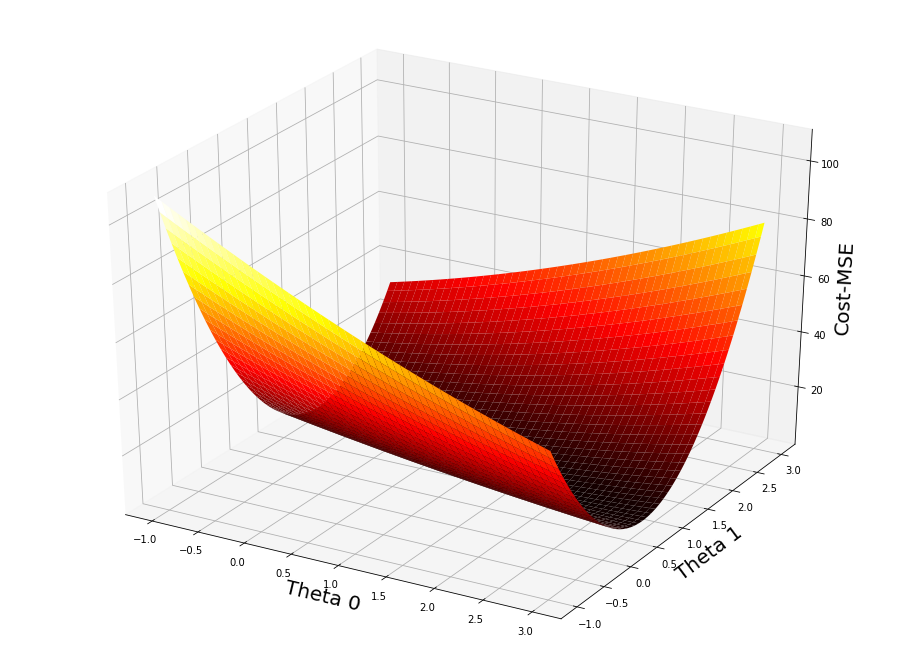

In [42]:
# Plotting mse

fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost-MSE',fontsize=20)

ax.plot_surface(plot_t0 , plot_t1 , plot_cost , cmap=cm.hot)

plt.show()

In [43]:
print('Min value of plot_cost : ', plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)
print('Min occurs at (i,j) :' ,ij_min)
print('Theta 0 at this point : ', plot_t0[111][91])
print('Theta 1 at this point : ', plot_t1[111][91])

Min value of plot_cost :  0.9483826526747163
Min occurs at (i,j) : (111, 91)
Theta 0 at this point :  0.829145728643216
Theta 1 at this point :  1.2311557788944723


## Partial derivatives of MSE wrt $\theta_0$ and $\theta_1$



In [47]:
def grad(x,y,thetas):
    n=y.size
    theta0_slope=-2*(1/n)*sum(y-thetas[0]-(thetas[1]*x))
    theta1_slope=-2*(1/n)*sum((y-thetas[0]-(thetas[1]*x))*x)
    
    return np.array([theta0_slope[0],theta1_slope[0]])

In [51]:
multiplier=0.01
thetas=np.array([2.9,2.9])

plot_vals=thetas.reshape(1,2)
mse_vals=mse(y_5,thetas[0]+thetas[1]*x_5)

for i in range(1000):
    thetas=thetas-multiplier*grad(x_5,y_5,thetas)
    plot_vals=np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals=np.append(arr=mse_vals,values=mse(y_5,thetas[0]+thetas[1]*x_5))
    
print('The min occurs at theta0 : ',thetas[0])
print('The min occurs at theta1 : ',thetas[1])
print('Mse is : ',mse(y_5,thetas[0]+thetas[1]*x_5))

The min occurs at theta0 :  0.8532230461743415
The min occurs at theta1 :  1.2214935332607393
Mse is :  [0.94797511]


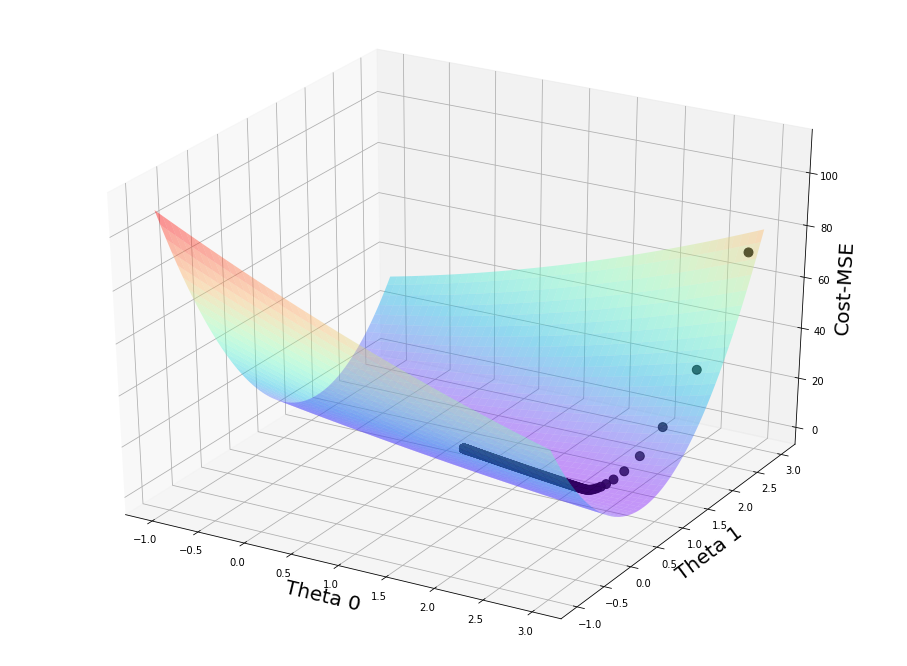

In [54]:
# Plotting mse

fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost-MSE',fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,color='black')

ax.plot_surface(plot_t0 , plot_t1 , plot_cost , cmap=cm.rainbow ,alpha=0.4)

plt.show()